In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  PIL import Image
import numpy as np
from tensorflow.keras import Input, Model
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import split_dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import tensorflow as tf
from tensorflow import keras


RSEED = 42
dataset_path = '../data/images/'

In [3]:


#import data

data = []

# Specify the path to your dataset
dataset_path = '../data/images/'

# Iterate through each plant folder
for plant_class in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, plant_class)
    
    # Iterate through each image in the plant folder
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        data.append({'Image_Path': image_path, 'Class': plant_class})

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data)

df

,Image_Path,Class
0,../data/images/Tomato___spider_mites/fa05ccd2-...,Tomato___spider_mites
1,../data/images/Tomato___spider_mites/fd3b6292-...,Tomato___spider_mites
2,../data/images/Tomato___spider_mites/82306885-...,Tomato___spider_mites
3,../data/images/Tomato___spider_mites/9c7f0991-...,Tomato___spider_mites
4,../data/images/Tomato___spider_mites/d7c5cad4-...,Tomato___spider_mites
...,...,...
95863,../data/images/Soybean___healthy/57c18b39-2a33...,Soybean___healthy
95864,../data/images/Soybean___healthy/4fdc663e-a8ea...,Soybean___healthy
95865,../data/images/Soybean___healthy/df807f13-078b...,Soybean___healthy
95866,../data/images/Soybean___healthy/60bf9858-951a...,Soybean___healthy


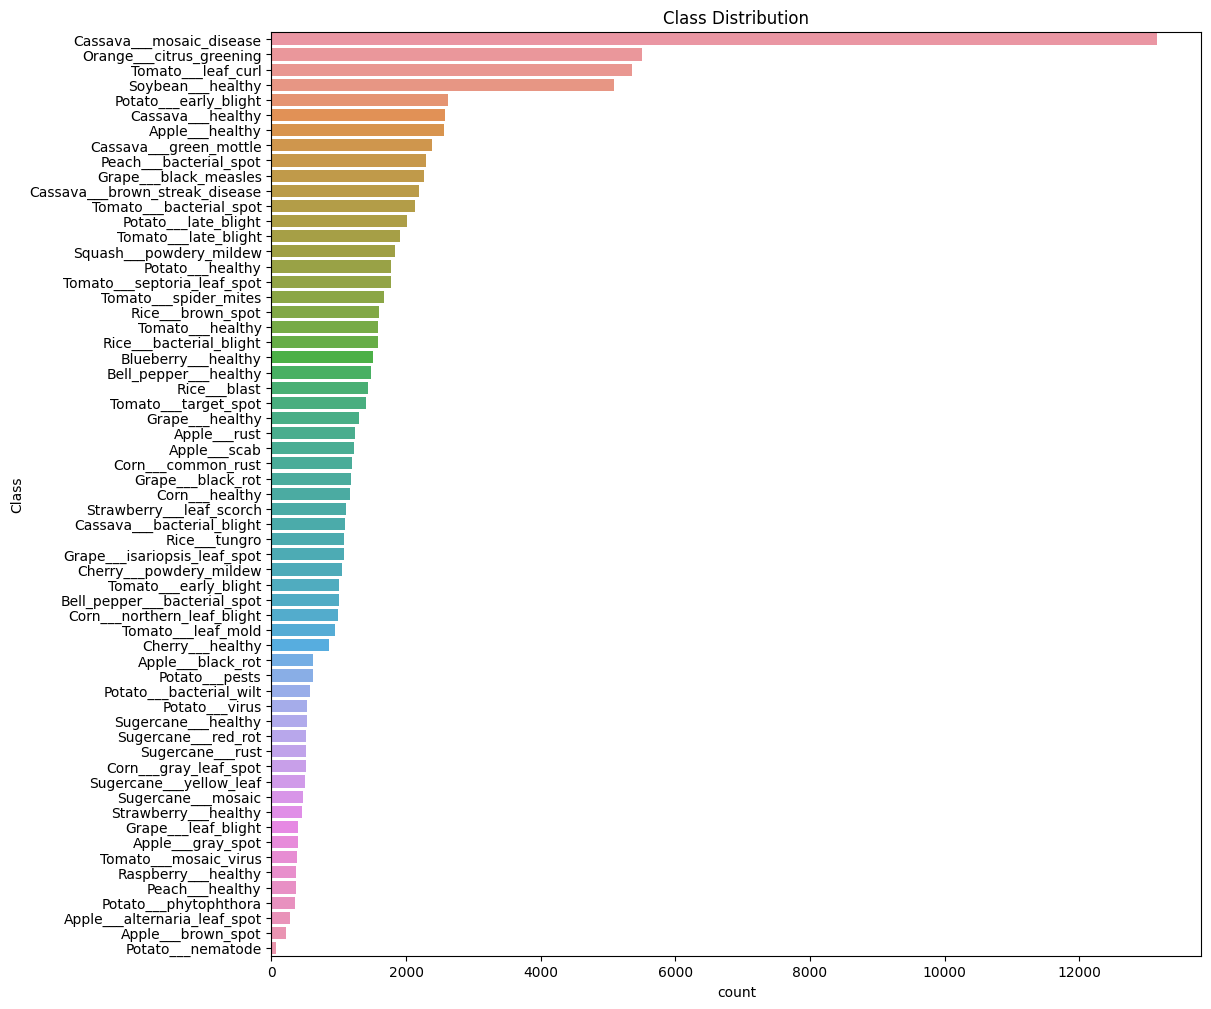

In [4]:
# Check the distribution of classes
class_counts = df['Class'].value_counts()
plt.figure(figsize=(12, 12))
sns.countplot(y='Class', data=df, order=class_counts.index)
plt.title('Class Distribution')
plt.show()

In [5]:
def rename_subfolder(parent_dir, subfolder_name, new_name):
    subfolder_path = os.path.join(parent_dir, subfolder_name)
    new_path = os.path.join(parent_dir, new_name)

    # Check if the subfolder exists
    if os.path.exists(subfolder_path):
        # Rename the subfolder
        os.rename(subfolder_path, new_path)
        print(f"{subfolder_name} renamed to {new_name} successfully.")
    else:
        print(f"Subfolder {subfolder_name} doesn't exist in {parent_dir}.")

# Example usage
parent_directory = "../data/images/"
subfolder_name = "Grape_leaf_blight"
new_name = "Grape___leaf_blight"

rename_subfolder(parent_directory, subfolder_name, new_name)

Subfolder Grape_leaf_blight doesn't exist in ../data/images/.


In [6]:
# Extract plant types from class names
df['plant_type'] = df['Class'].apply(lambda x: x.split('___')[0])

# Count the occurrences of each plant type
plant_type_counts = df['plant_type'].value_counts()

# Display the count of each plant type
print(plant_type_counts)

plant_type
Cassava        21397
Tomato         18160
Potato          8552
Apple           6542
Grape           6232
Rice            5704
Orange          5507
Soybean         5090
Corn            3852
Peach           2657
Sugercane       2521
Bell_pepper     2475
Cherry          1906
Squash          1835
Strawberry      1565
Blueberry       1502
Raspberry        371
Name: count, dtype: int64


In [7]:
problematic_rows = df[df['Class'].apply(lambda x: len(x.split('___')) < 2)]
print("Problematic Rows:")
print(problematic_rows)

Problematic Rows:
Empty DataFrame
Columns: [Image_Path, Class, plant_type]
Index: []


In [8]:

#problematic_rows = df[df['Class'].str.contains('Grape_leaf_blight')]
df['Class'] = df['Class'].replace('Grape_leaf_blight', 'Grape___leaf_blight', regex=True)


In [9]:
# Extract disease types from class names
df['disease_type'] = df['Class'].apply(lambda x: x.split('___')[1])

# Count the occurrences of each disease type
disease_type_counts = df['disease_type'].value_counts()

# Display the count of each disease type
print(disease_type_counts)

disease_type
healthy                 21615
mosaic_disease          13158
citrus_greening          5507
bacterial_spot           5421
leaf_curl                5357
late_blight              3929
early_blight             3628
powdery_mildew           2887
bacterial_blight         2671
green_mottle             2386
black_measles            2271
brown_streak_disease     2189
brown_spot               1815
black_rot                1801
septoria_leaf_spot       1771
rust                     1755
spider_mites             1676
blast                    1440
target_spot              1404
scab                     1222
common_rust              1192
leaf_scorch              1109
tungro                   1080
isariopsis_leaf_spot     1076
northern_leaf_blight      985
leaf_mold                 952
pests                     611
bacterial_wilt            569
virus                     532
red_rot                   518
gray_leaf_spot            513
yellow_leaf               505
mosaic                    4

In [10]:
labels = np.unique(df['disease_type']).tolist()

labels

['alternaria_leaf_spot',
 'bacterial_blight',
 'bacterial_spot',
 'bacterial_wilt',
 'black_measles',
 'black_rot',
 'blast',
 'brown_spot',
 'brown_streak_disease',
 'citrus_greening',
 'common_rust',
 'early_blight',
 'gray_leaf_spot',
 'gray_spot',
 'green_mottle',
 'healthy',
 'isariopsis_leaf_spot',
 'late_blight',
 'leaf_blight',
 'leaf_curl',
 'leaf_mold',
 'leaf_scorch',
 'mosaic',
 'mosaic_disease',
 'mosaic_virus',
 'nematode',
 'northern_leaf_blight',
 'pests',
 'phytophthora',
 'powdery_mildew',
 'red_rot',
 'rust',
 'scab',
 'septoria_leaf_spot',
 'spider_mites',
 'target_spot',
 'tungro',
 'virus',
 'yellow_leaf']

In [11]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Split data into features (image paths) and labels (classes)
X = df['Image_Path']
y = df['disease_type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define paths for the training and testing data folders
train_dir = '../data/train/'
test_dir = '../data/test/'

# Create directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Copy images to the training folder
for image_path, label in zip(X_train, y_train):
    dest_folder = os.path.join(train_dir, label)
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    shutil.copy(image_path, dest_folder)

# Copy images to the testing folder
for image_path, label in zip(X_test, y_test):
    dest_folder = os.path.join(test_dir, label)
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    shutil.copy(image_path, dest_folder)


In [207]:

train_ds_path = '../data/train/'
def load_preprocess_split_train_val(train_ds_path):
    '''
    Function needs filefath as parameter, it will create a validation dataset of 20% of the total df,
    Needs an RSEED as global variable,
    Image will be cropped to 1:1 and altered to 224 x 224
    '''
    image = tf.keras.utils.image_dataset_from_directory(
        train_ds_path,
        validation_split = 0.2,
        subset = "both",
        seed = RSEED,
        image_size = (224, 224),
        crop_to_aspect_ratio = True,
        label_mode = 'categorical'
    )
    return image

In [208]:
train_ds, val_ds = load_preprocess_split_train_val(train_ds_path)

Found 76694 files belonging to 39 classes.
Using 61356 files for training.
Using 15338 files for validation.


In [166]:
print("Training Dataset:")
for images, labels in train_ds.take(1):
    print("Shape of images batch:", images.shape)
    print("Data type of images batch:", images.dtype)
    print("Shape of labels batch:", labels.shape)
    print("Data type of labels batch:", labels.dtype)

Training Dataset:
Shape of images batch: (32, 224, 224, 3)
Data type of images batch: <dtype: 'float32'>
Shape of labels batch: (32, 39)
Data type of labels batch: <dtype: 'float32'>


Found 76694 files belonging to 39 classes.
Using 61356 files for training.
Using 15338 files for validation.


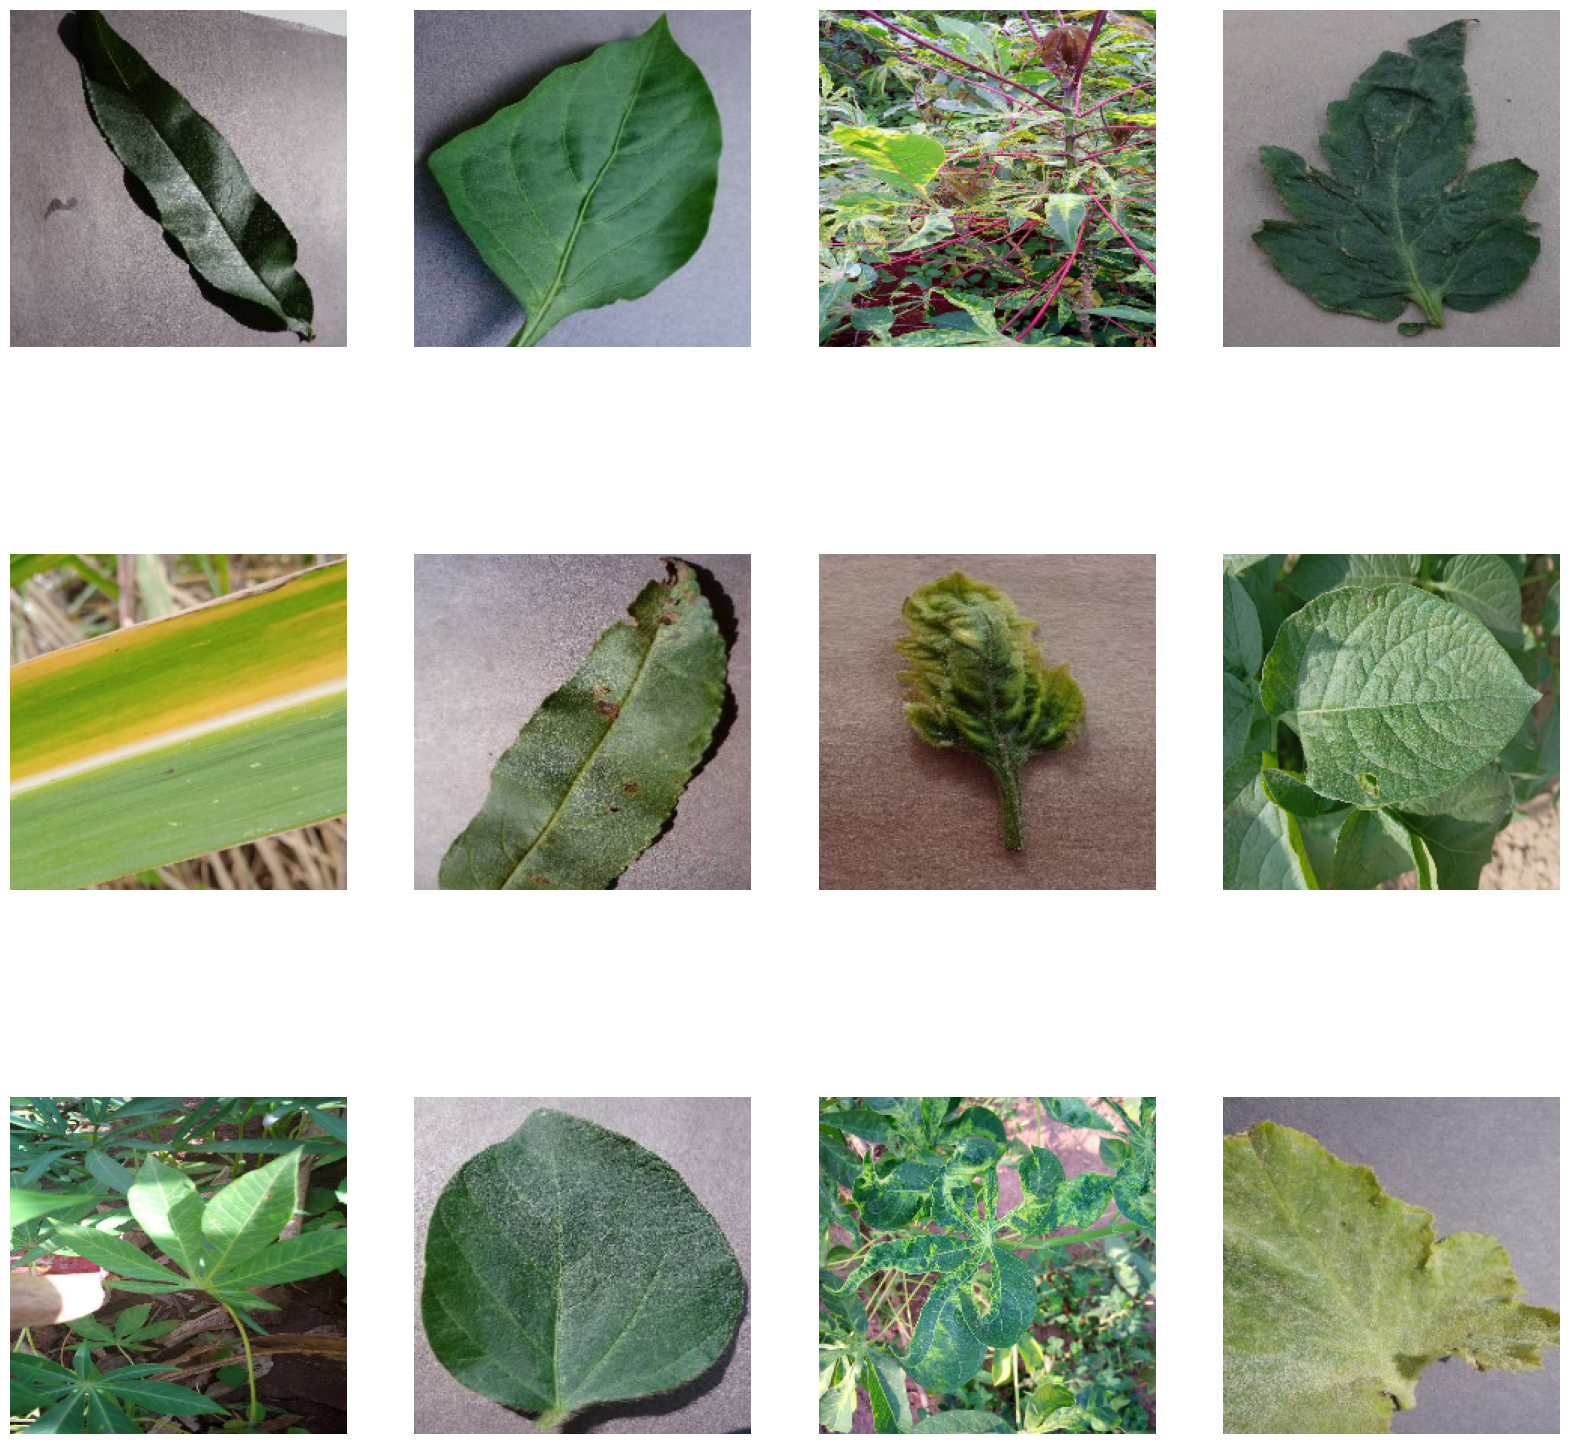

In [209]:
import matplotlib.pyplot as plt

# Load and preprocess the dataset
train_ds_path = '../data/train/'
train_ds, val_ds = load_preprocess_split_train_val(train_ds_path)

# Extract a batch of images from the training dataset
for images, _ in train_ds.take(1):  # Ignore labels by using "_"
    # Create a figure with a larger size
    fig, axes = plt.subplots(3, 4, figsize=(20, 20))
    
    # Display the first 10 images from the batch
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].numpy().astype("uint8"))
        ax.axis("off")
    
    plt.show()




In [15]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 39), dtype=tf.float32, name=None))>

In [21]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam


# Define the ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add your custom classification head
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(39, activation='softmax')(x)  # NUM_CLASSES should be defined

# Combine the base model with the custom classification head
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model with adjusted batch size and prefetching
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    batch_size=128,
                    steps_per_epoch=len(train_ds),
                    validation_steps=len(val_ds)
                    )
        



Epoch 1/20
1918/1918 [==============================] - 2691s 1s/step - loss: 62.6547 - accuracy: 0.6882 - val_loss: 35.3714 - val_accuracy: 0.8164
Epoch 2/20
1918/1918 [==============================] - 1200s 625ms/step - loss: 65.8480 - accuracy: 0.7888 - val_loss: 45.5960 - val_accuracy: 0.8485
Epoch 3/20
1918/1918 [==============================] - 1255s 654ms/step - loss: 67.4109 - accuracy: 0.8301 - val_loss: 59.0828 - val_accuracy: 0.8463
Epoch 4/20
1918/1918 [==============================] - 1289s 672ms/step - loss: 64.5445 - accuracy: 0.8591 - val_loss: 88.1190 - val_accuracy: 0.8563
Epoch 5/20
1918/1918 [==============================] - 1265s 659ms/step - loss: 66.2180 - accuracy: 0.8730 - val_loss: 76.2081 - val_accuracy: 0.8697
Epoch 6/20
1918/1918 [==============================] - 1272s 663ms/step - loss: 61.1774 - accuracy: 0.8916 - val_loss: 92.8621 - val_accuracy: 0.8616
Epoch 7/20
1918/1918 [==============================] - 1309s 682ms/step - loss: 59.8789 - accura


Average Training Accuracy: 0.9069430887699127
Average Validation Accuracy: 0.8701297402381897


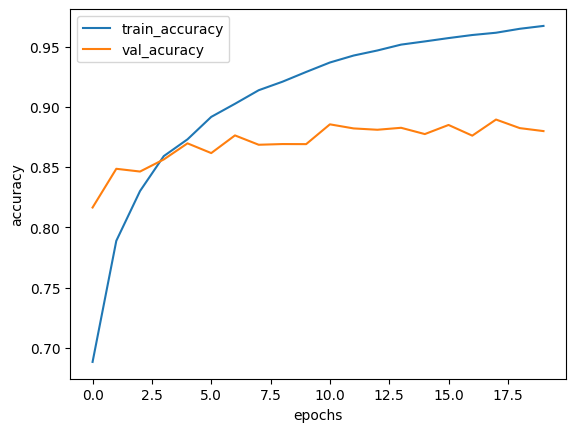

In [22]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_acuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
print()
# Calculate average training accuracy
avg_train_accuracy = sum(history.history['accuracy']) / len(history.history['accuracy'])

# Calculate average validation accuracy
avg_val_accuracy = sum(history.history['val_accuracy']) / len(history.history['val_accuracy'])

print("Average Training Accuracy:", avg_train_accuracy)
print("Average Validation Accuracy:", avg_val_accuracy)



# Images augmenttation

# preprocess images for efficientnetB0

With this code we can do preprocessing as it done for train base model

In [222]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define preprocessing function
def preprocess_image(image):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.efficientnet.preprocess_input(image)
    return image

# Use ImageDataGenerator for preprocessing images from directory
datagen = ImageDataGenerator(preprocessing_function=preprocess_image, validation_split=0.2)

# Create a generator for your images
image_generator = datagen.flow_from_directory(
    train_ds_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_image_generator = datagen.flow_from_directory(
    train_ds_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')


Found 61372 images belonging to 39 classes.
Found 15322 images belonging to 39 classes.


# Image augmenttaion

This code take images from train data directory and split it to train and validation set. It also generate augmented image from train set and apply rescaling for both train and validation set

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # val 20%

val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_data = train_datagen.flow_from_directory(train_ds_path, 
                                               target_size=(224, 224), 
                                               color_mode='rgb',
                                               batch_size=batch_size, 
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset = 'training') 

val_data = val_datagen.flow_from_directory(train_ds_path, 
                                           target_size=(224, 224), 
                                           color_mode='rgb',
                                           batch_size=batch_size, 
                                           class_mode='categorical',
                                           shuffle=False,
                                           subset = 'validation')

In [147]:
# Generate a batch of data from the generator
images, labels = train_generator.next()

# Check the shape and data type of the images and labels
print("Shape of images batch:", images.shape)
print("Data type of images batch:", images.dtype)
print("Shape of labels batch:", labels.shape)
print("Data type of labels batch:", labels.dtype)


Shape of images batch: (32, 224, 224, 3)
Data type of images batch: float32
Shape of labels batch: (32, 39)
Data type of labels batch: float32


In [ ]:
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_ds_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode = 'categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_ds_path, # same directory as training data
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode = 'categorical',
    subset='validation') # set as validation data


In [ ]:
# This code did not work
dataset_path = '../data/train/'

# Define train and validation sets (80% - 20%)
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=RSEED,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=RSEED,
  image_size=(img_height, img_width),
  batch_size=batch_size)

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

# Visualize the augmented images 

In [88]:
batch = next(train_generator)


In [226]:
import matplotlib.pyplot as plt

# Get the first batch of images and labels
batch = next(train_ds)

# Extract images from the batch
images = batch[0]

# Plot multiple images
plt.figure(figsize=(10, 10))
for i in range(20):  # Adjust the number of images to display
    plt.subplot(4, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()


TypeError: '_PrefetchDataset' object is not an iterator

In [225]:
import matplotlib.pyplot as plt

# Get the first batch of images and labels
batch = next(val_ds)

# Extract images from the batch
images = batch[0]

# Plot multiple images
plt.figure(figsize=(10, 10))
for i in range(4):  # Adjust the number of images to display
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

TypeError: '_PrefetchDataset' object is not an iterator

In [156]:
for images, labels in train_ds.take(1):
    # Check the shape and data type of the images and labels
    print("Shape of images batch:", images.shape)
    print("Data type of images batch:", images.dtype)
    print("Shape of labels batch:", labels.shape)
    print("Data type of labels batch:", labels.dtype)

Shape of images batch: (32, 224, 224, 3)
Data type of images batch: <dtype: 'float32'>
Shape of labels batch: (32,)
Data type of labels batch: <dtype: 'int32'>
